### 01 Instructor Binary Classification

In [1]:

# Initial imports
from path import Path
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
# Read in data
# Initial imports
from path import Path
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

%matplotlib inline

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,"""BILL_AMT4""",BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Define the features set `X` by including all the columns of the DataFrame except the `DEFAULT` column.

In [3]:
# Define features data
X = df.copy()
X = X.drop(columns=["DEFAULT"])
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,"""BILL_AMT4""",BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [4]:
# Define target data
y = df["DEFAULT"].values
y = y.reshape(-1, 1)
y[:5]

array([[1],
       [1],
       [0],
       [0],
       [0]])

Create the training an testing sets using the `train_test_split` function from `sklearn`.

In [5]:
# Create training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

Scale the features data using the `StandardScaler` from `sklearn`.

In [ ]:
# Create the scaler instance
X_scaler = StandardScaler()

In [ ]:
# Fit the scaler
X_scaler.fit(X_train)

In [ ]:
# Scale the features data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

Create a neural network model with `23` inputs, one hidden layer with `46` units, and an output layer with a single output. Use the `relu` activation function for the first layer and `sigmoid` for the second layer.

In [ ]:
# Define the model
number_inputs = 23
number_hidden_nodes = 69

nn = Sequential()
nn.add(Dense(units=number_hidden_nodes, input_dim=number_inputs, activation="relu"))
nn.add(Dense(1, activation="sigmoid"))

Compile the neural network model using the `binary_crossentropy` loss function, the `adam` optimizer, and `accuracy` as additional metric.

In [ ]:
# Compile model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

Fit the model with `100` epochs.

In [ ]:
# Fit the model
model = nn.fit(X_train_scaled, y_train, epochs=100)

In [ ]:
# Create a dataframe with the history dictionary
df_plot = pd.DataFrame(model.history, index=range(1, len(model.history["loss"]) + 1))

# Plot the loss
df_plot.plot(y="loss")

In [ ]:
# Plot the accuracy
df_plot.plot(y="accuracy")


Evaluate the model using testing data and the `evaluate` method.

In [ ]:
# Evaluate the model fit with linear dummy data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


### 02 Instructor Multivalued_Classification

# Neural Network Smartphone Activity Detector

In this activity, you will train a neural network to use smartphone data to predict the activity of the user. 

This dataset has already been separated into input features and target activities. Additional information on the dataset can be found here. 

http://archive.ics.uci.edu/ml/datasets/Smartphone-Based+Recognition+of+Human+Activities+and+Postural+Transitions


### Data Pre-Processing

Prepare the data for the neural network. This includes splitting the data into a training and testing dataset, Scaling the data, and encoding the categorical target values


In [6]:

from pathlib import Path

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [7]:
# Read the input features into `X`
X = pd.read_csv(Path("./Resources/features.csv"), header=None)
X.head()

# Read the target values into `y`
y = pd.read_csv(Path("./Resources/target.csv"))
y.head()

y.activity.value_counts()

standing              1423
laying                1413
sitting               1293
walking               1226
walking_upstairs      1073
walking_downstairs     987
stand_to_lie            90
sit_to_lie              75
lie_to_sit              60
lie_to_stand            57
stand_to_sit            47
sit_to_stand            23
Name: activity, dtype: int64

In [8]:
# Split the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Scale the training and testing input features using StandardScaler
X_scaler = StandardScaler()
X_scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [9]:
# Apply One-hot encoding to the target labels
enc = OneHotEncoder()
enc.fit(y_train)

encoded_y_train = enc.transform(y_train).toarray()
encoded_y_test = enc.transform(y_test).toarray()
encoded_y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [10]:
# Build a Deep Neural Network

# Create a sequential model
model = Sequential()

# Add the first layer where the input dimensions are the 561 columns of the training data
model.add(Dense(100, activation='relu', input_dim=X_train_scaled.shape[1]))

# The output layer has 12 columns that are one-hot encoded
y_train.activity.value_counts()
number_outputs = 12

In [11]:
# Add output layer using 12 output nodes
model.add(Dense(number_outputs, activation="softmax"))

# Compile the model using categorical_crossentropy for the loss function, the adam optimizer,
# and add accuracy to the training metrics
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])



In [12]:
# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               56200     
_________________________________________________________________
dense_1 (Dense)              (None, 12)                1212      
Total params: 57,412
Trainable params: 57,412
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Use the training data to fit (train) the model
# @NOTE: Experiment with the number of training epochs to find the minimum iterations required to achieve a good accuracy
model.fit(
    X_train_scaled,
    encoded_y_train,
    epochs=30,
    shuffle=True,
    verbose=2
)

# Evaluate the Model

# Evaluate the model using the testing data
model_loss, model_accuracy = model.evaluate(X_test_scaled, encoded_y_test, verbose=2)
print(f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")


Epoch 1/30
183/183 - 0s - loss: 0.3742 - accuracy: 0.8706
Epoch 2/30
183/183 - 0s - loss: 0.1392 - accuracy: 0.9463
Epoch 3/30
183/183 - 0s - loss: 0.0995 - accuracy: 0.9631
Epoch 4/30
183/183 - 0s - loss: 0.0732 - accuracy: 0.9732
Epoch 5/30
183/183 - 0s - loss: 0.0652 - accuracy: 0.9782
Epoch 6/30
183/183 - 0s - loss: 0.0509 - accuracy: 0.9818
Epoch 7/30
183/183 - 0s - loss: 0.0404 - accuracy: 0.9861
Epoch 8/30
183/183 - 0s - loss: 0.0407 - accuracy: 0.9864
Epoch 9/30
183/183 - 0s - loss: 0.0314 - accuracy: 0.9899
Epoch 10/30
183/183 - 0s - loss: 0.0237 - accuracy: 0.9935
Epoch 11/30
183/183 - 0s - loss: 0.0218 - accuracy: 0.9936
Epoch 12/30
183/183 - 0s - loss: 0.0248 - accuracy: 0.9926
Epoch 13/30
183/183 - 0s - loss: 0.0311 - accuracy: 0.9883
Epoch 14/30
183/183 - 0s - loss: 0.0147 - accuracy: 0.9943
Epoch 15/30
183/183 - 0s - loss: 0.0121 - accuracy: 0.9967
Epoch 16/30
183/183 - 0s - loss: 0.0097 - accuracy: 0.9974
Epoch 17/30
183/183 - 0s - loss: 0.0077 - accuracy: 0.9981
Epoch 

In [14]:
# Make predictions
predicted = model.predict(X_test_scaled)
predicted = enc.inverse_transform(predicted).flatten().tolist()
results = pd.DataFrame({
    "Actual": y_test.activity.values,
    "Predicted": predicted
})
results.head(10)

,Actual,Predicted
0,walking_upstairs,walking_upstairs
1,laying,laying
2,sitting,sitting
3,sitting,sitting
4,walking,walking
5,sitting,sitting
6,lie_to_sit,lie_to_sit
7,walking_downstairs,walking_downstairs
8,laying,laying
9,sitting,sitting


In [15]:
# Print the Classification Report
from sklearn.metrics import classification_report
print(classification_report(results.Actual, results.Predicted))



                    precision    recall  f1-score   support

            laying       1.00      1.00      1.00       355
        lie_to_sit       0.74      0.93      0.82        15
      lie_to_stand       0.88      0.64      0.74        11
        sit_to_lie       0.80      0.87      0.83        23
      sit_to_stand       1.00      0.75      0.86         4
           sitting       0.99      0.93      0.96       337
      stand_to_lie       0.81      0.72      0.76        18
      stand_to_sit       0.88      0.93      0.90        15
          standing       0.95      0.99      0.97       367
           walking       0.99      0.99      0.99       300
walking_downstairs       0.99      1.00      0.99       230
  walking_upstairs       1.00      0.99      0.99       267

          accuracy                           0.98      1942
         macro avg       0.92      0.90      0.90      1942
      weighted avg       0.98      0.98      0.98      1942



### 03 Everyone MNIST

In [16]:
## Dependencies

# Dependencies to Visualize the model
%matplotlib inline
from IPython.display import Image, SVG
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)


In [17]:
# Filepaths, numpy, and Tensorflow
import os
import numpy as np
import tensorflow as tf

In [18]:

# Sklearn scaling
from sklearn.preprocessing import MinMaxScaler

### Keras Specific Dependencies

# Keras
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist

In [19]:
## Loading and Preprocessing our Data

### Load the MNIST Handwriting Dataset from Keras

(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("Training Data Info")
print("Training Data Shape:", X_train.shape)
print("Training Data Labels Shape:", y_train.shape)


Training Data Info
Training Data Shape: (60000, 28, 28)
Training Data Labels Shape: (60000,)


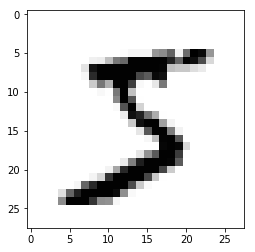

In [20]:

### Plot the first digit

# Plot the first image from the dataset
plt.imshow(X_train[0,:,:], cmap=plt.cm.Greys)

In [21]:
### Each Image is a 28x28 Pixel greyscale image with values from 0 to 255

# Our image is an array of pixels ranging from 0 to 255
X_train[0, :, :]


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
### For Logistic Regression, we want to flatten our data into rows of 1D image arrays

# We want to flatten our image of 28x28 pixels to a 1D array of 784 pixels
ndims = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], ndims)
X_test = X_test.reshape(X_test.shape[0], ndims)
print("Training Shape:", X_train.shape)
print("Testing Shape:", X_test.shape)


In [ ]:
## Scaling and Normalization

We use Sklearn's MinMaxScaler to normalize our data between 0 and 1

# Next, we normalize our training data to be between 0 and 1
scaler = MinMaxScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Alternative way to normalize this dataset since we know that the max pixel value is 255
# X_train = X_train.astype("float32")
# X_test = X_test.astype("float32")
# X_train /= 255.0
# X_test /= 255.0

## One-Hot Encoding

# We need to one-hot encode our integer labels using the `to_categorical` helper function

# Our Training and Testing labels are integer encoded from 0 to 9
y_train[:20]

In [ ]:
# We need to convert our target labels (expected values) to categorical data
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
# Original label of `5` is one-hot encoded as `0000010000`
y_train[0]


In [ ]:
## Building our Model

# In this example, we are going to build a Deep Multi-Layer Perceptron model with 2 hidden layers.

## Our first step is to create an empty sequential model

# Create an empty sequential model
model = Sequential()


In [ ]:

## Next, we add our first hidden layer

# In the first hidden layer, we must also specify the dimension of our input layer. This will simply be the number of elements (pixels) in each image.

# Add the first layer where the input dimensions are the 784 pixel values
# We can also choose our activation function. `relu` is a common

model.add(Dense(100, activation='relu', input_dim=X_train.shape[1]))

In [ ]:
## We then add a second hidden layer with 100 densely connected nodes

# A dense layer is when every node from the previous layer is connected 
# to each node in the current layer.

# Add a second hidden layer
model.add(Dense(100, activation='relu'))

In [ ]:
## Our final output layer uses a `softmax` activation function for logistic regression.

# We also need to specify the number of output classes. In this case, the number of digits that we wish to classify.

# Add our final output layer where the number of nodes 
# corresponds to the number of y labels
model.add(Dense(num_classes, activation='softmax'))

## Compiling our Model

# Compile the model
model.compile(loss="categorical_crossentropy",
              optimizer="adam", metrics=['accuracy'])


In [ ]:
## Model Summary

# We can summarize our model
model.summary()

## Compile and Train our Model

# Now that we have our model architecture defined, we must compile the model using a loss function and optimizer. We can also specify additional training metrics such as accuracy.

# Use categorical crossentropy for categorical data and mean squared error for regression
# Hint: your output layer in this example is using software for logistic regression (categorical)
# If your output layer activation was `linear` then you may want to use `mse` for loss
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


In [ ]:

## Finally, we train our model using our training data

# Training consists of updating our weights using our optimizer and loss function. In this example, we choose 10 iterations (loops) of training that are called epochs.

# We also choose to shuffle our training data and increase the detail printed out during each training cycle.

# Fit (train) the model
model.fit(
    X_train,
    y_train,
    epochs=10,
    shuffle=True,
    verbose=2
)

In [ ]:
## Saving and Loading models

# We can save our trained models using the HDF5 binary format with the extension `.h5`

# Save the model
model.save("mnist_trained.h5")

# Load the model
from tensorflow.keras.models import load_model
model = load_model("mnist_trained.h5")

In [ ]:
## Evaluating the Model

# We use our testing data to validate our model. This is how we determine the validity of our model (i.e. the ability to predict new and previously unseen data points)

# Evaluate the model using the training data 
model_loss, model_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


In [ ]:
## Making Predictions

# We can use our trained model to make predictions using `model.predict`

# Grab just one data point to test with
test = np.expand_dims(X_train[0], axis=0)
test.shape

plt.imshow(scaler.inverse_transform(test).reshape(28, 28), cmap=plt.cm.Greys)

# Make a prediction. The result should be 0000010000000 for a 5
model.predict(test).round()

In [ ]:
# Grab just one data point to test with
test = np.expand_dims(X_train[2], axis=0)
test.shape

plt.imshow(scaler.inverse_transform(test).reshape(28, 28), cmap=plt.cm.Greys)

# Make a prediction. The resulting class should match the digit
print(f"One-Hot-Encoded Prediction: {model.predict(test).round()}")
print(f"Predicted class: {model.predict_classes(test)}")

# Import a Custom Image

filepath = "./Images/test8.png"

from tensorflow.keras.preprocessing import image
image_size = (28, 28)
im = image.load_img(filepath, target_size=image_size, color_mode="grayscale")
im

# Convert the image to a numpy array 
from tensorflow.keras.preprocessing.image import img_to_array
image = img_to_array(im)
image.shape

# Scale the image pixels by 255 (or use a scaler from sklearn here)
image /= 255

# Flatten into a 1x28*28 array 
img = image.flatten().reshape(-1, 28*28)
img.shape

plt.imshow(img.reshape(28, 28), cmap=plt.cm.Greys)

# Invert the pixel values to match the original data
img = 1 - img
plt.imshow(img.reshape(28, 28), cmap=plt.cm.Greys)

# Make predictions
model.predict_classes(img)

### 04 Regression

In [ ]:
# Deep Learning

# Initial imports
from path import Path
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

%matplotlib inline

# Read in data
data = Path("./Resources/winequality.csv")
df = pd.read_csv(data, delimiter=";")
df.head()

# Create the features (X) and target (y) sets
X = df.iloc[:, 0:11].values
y = df["quality"].values

# Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

# Define the model - shallow neural net
number_hidden_nodes = 8
number_input_features = 11

nn = Sequential()
# Hidden layer
nn.add(
    Dense(units=number_hidden_nodes, input_dim=number_input_features, activation="relu")
)
# Output layer
nn.add(Dense(units=1, activation="linear"))

# Compile the model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# Train the model
model_1 = nn.fit(X, y, validation_split=0.3, epochs=200)

# Plot the train and test loss function
plt.plot(model_1.history["loss"])
plt.title("loss_function - 1 hidden layer")
plt.legend(["loss"])
plt.show()

# Define the model - deep neural net
number_input_features = 11
hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 4

nn = Sequential()
# First hidden layer
nn.add(
    Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)
# Second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))
# Output layer
nn.add(Dense(units=1, activation="linear"))

# Compile model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# Fit the model
model_2 = nn.fit(X, y, validation_split=0.3, epochs=200)

plt.plot(model_1.history["loss"])
plt.plot(model_2.history["loss"])
plt.title("loss_function - Training")
plt.legend(["1 hidden layer", "2 hidden layers"])
plt.show()

# Train vs test for shallow net
plt.plot(model_1.history["loss"])
plt.plot(model_1.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - 1 hidden layer")
plt.legend(["train", "test"])
plt.show()

# Train vs test for deep net
plt.plot(model_2.history["loss"])
plt.plot(model_2.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - 2 hidden layers")
plt.legend(["train", "test"])
plt.show()